# Метод Ритца

In [1]:
import matplotlib.pyplot as plot
import scipy.integrate as spi
import scipy.linalg as sla
import numpy as np

In [ ]:
def RitzMethod(rho, q, f, mu, N):
    pass

In [2]:
rho = lambda x: (2 - x) ** 2
q = lambda x: 0
f = lambda x: (np.pi**2 / 4) * (2 - x) * np.sin(np.pi * x / 2)
mu = 2

N = 3  # Число базисных функций
phi = [lambda x, i=i: np.sin(np.pi * (i + 1) * x / 2) for i in range(N)]
dphi = [lambda x, i=i: (np.pi * (i + 1) / 2) * np.cos(np.pi * (i + 1) * x / 2) for i in range(N)]

A = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        A[i, j] = spi.quad(lambda x: rho(x) * dphi[i](x) * dphi[j](x) + q(x) * phi[i](x) * phi[j](x), 0, 1)[0]

b = np.zeros(N)
for i in range(N):
    b[i] = spi.quad(lambda x: f(x) * phi[i](x), 0, 1)[0]
    
c = sla.solve(A, b)

u_approx = lambda x: sum(c[i] * phi[i](x) for i in range(N))

In [3]:
x_vals = np.linspace(0, 1, 100)
y_vals = np.array([u_approx(x) for x in x_vals])

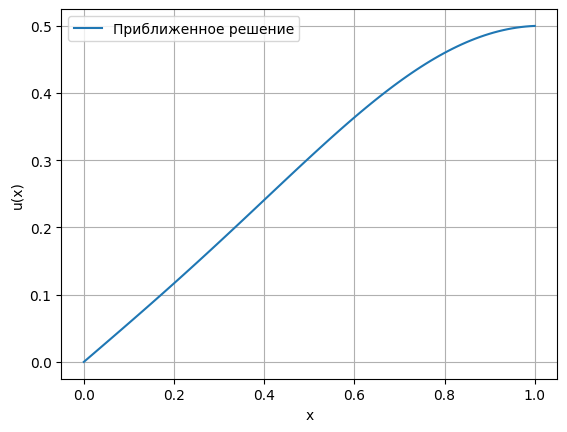

In [4]:
plot.plot(x_vals, y_vals, label='Приближенное решение')
plot.xlabel('x')
plot.ylabel('u(x)')
plot.legend()
plot.grid()
plot.show()